#### This notebook is about using feature selection techniques to obtain best features for binary classificaion (uptrend/downtrend). The target is such that Target(t)=1 if Price(t+1)>Price(t), else Target(t)=-1

In [31]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from technical_indicators import *

pd.set_option("display.max_columns", 15)
pd.set_option("display.width", 500)
pd.set_option("display.max_rows", 100)

### Setting up data 

In [32]:
df = pd.read_csv('Data/EUR_USD_Daily.csv', index_col=0)
df = moving_average(df, 5)
df = moving_average(df, 8)
df = moving_average(df, 10)
df = moving_average(df, 13)
df = moving_average(df, 15)
df = moving_average(df, 20)
df = moving_average(df, 21)
df = EMA(df, 5)
df = EMA(df, 10)
df = EMA(df, 15)
df = EMA(df, 20)
df = MACD(df, 12, 26, 9)
df = MACD(df, 21, 55, 13)
df = stochastic_oscillator(df, 5)
df = stochastic_oscillator(df, 8)
df = stochastic_oscillator(df, 10)
df = stochastic_oscillator(df, 13)
df = stochastic_oscillator(df, 15)
df = stochastic_oscillator(df, 20)
df = stochastic_oscillator(df, 21)
df = williams_R(df, 5)
df = williams_R(df, 7)
df = williams_R(df, 8)
df = williams_R(df, 10)
df = williams_R(df, 13)
df = williams_R(df, 14)
df = williams_R(df, 15)
df = williams_R(df, 20)
df = williams_R(df, 21)
df = relative_strength_index(df, 5)
df = relative_strength_index(df, 7)
df = relative_strength_index(df, 8)
df = relative_strength_index(df, 10)
df = relative_strength_index(df, 13)
df = relative_strength_index(df, 14)
df = relative_strength_index(df, 15)
df = relative_strength_index(df, 20)
df = relative_strength_index(df, 21)
df = momentum(df, 5)
df = momentum(df, 7)
df = momentum(df, 8)
df = momentum(df, 10)
df = momentum(df, 13)
df = momentum(df, 14)
df = momentum(df, 15)
df = momentum(df, 20)
df = momentum(df, 21)
df = change_rate(df, 1)
df = change_rate(df, 2)
df = change_rate(df, 3)
df = change_rate(df, 4)
df = change_rate(df, 5)
df = average_true_range(df, 7)
df = average_true_range(df, 14)
df = average_true_range(df, 21)
df = average_directional_index_and_DI(df, 5)
df = average_directional_index_and_DI(df, 7)
df = average_directional_index_and_DI(df, 8)
df = average_directional_index_and_DI(df, 10)
df = average_directional_index_and_DI(df, 13)
df = average_directional_index_and_DI(df, 14)
df = average_directional_index_and_DI(df, 15)
df = average_directional_index_and_DI(df, 20)
df = average_directional_index_and_DI(df, 21)

In [33]:
def classification(df, n):
    df['Next_change'] = df['Change'].shift(-n)
    df.dropna(inplace=True)
    df['Target'] = np.where(df['Next_change'] > 0.0, 1, -1)
    df.drop(columns='Next_change', inplace=True)

    return df

# Set how many days look ahead
look_ahead = 1
df = classification(df, look_ahead)
df.drop(columns=['Change'], inplace=True)
df.dropna(inplace=True)

In [34]:
df.describe()

,Price,Open,High,Low,5ma,8ma,10ma,...,+DI 20,-DI 20,ADX 20,+DI 21,-DI 21,ADX 21,Target
count,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,...,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000
mean,1.217505,1.217403,1.223111,1.211698,1.217430,1.217376,1.217341,...,0.207540,0.194194,0.213154,0.207531,0.194213,0.208327,0.003889
std,0.168610,0.168660,0.169204,0.168025,0.168552,0.168522,0.168500,...,0.055972,0.056960,0.086008,0.054676,0.055641,0.084286,1.000095
min,0.827300,0.826800,0.832600,0.822700,0.833740,0.836675,0.838280,...,0.059463,0.045824,0.073019,0.060604,0.048064,0.071261,-1.000000
25%,1.116800,1.116500,1.121800,1.112300,1.117880,1.118450,1.118160,...,0.168097,0.152536,0.149307,0.169131,0.153726,0.145257,-1.000000
50%,1.238300,1.238300,1.243600,1.232800,1.237040,1.237100,1.236690,...,0.204336,0.191893,0.191360,0.204495,0.192219,0.187311,1.000000
75%,1.337700,1.337700,1.342600,1.331700,1.337580,1.337225,1.337230,...,0.244132,0.230395,0.264290,0.243462,0.229077,0.257721,1.000000
max,1.598800,1.600000,1.603900,1.586500,1.591100,1.588500,1.586300,...,0.396784,0.412712,0.565926,0.388898,0.407383,0.556538,1.000000


In [35]:
col_name = list(df)
x = df.values

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=col_name)

X = df.iloc[:,:-1]  #independent columns
y = df.iloc[:,-1] # target

best_features = SelectKBest(score_func=chi2, k='all')
new_fit = best_features.fit(X.values, y.values)
df_scores = pd.DataFrame(new_fit.scores_)
df_columns = pd.DataFrame(X.columns)

# concatenate two dataframes for visualization 
feature_score = pd.concat([df_columns, df_scores], axis=1)
feature_score.columns = ['Features', 'Score']  #naming the dataframe columns

# print(feature_score.nlargest(df.shape[1]-1, 'Score'))
print(feature_score.nlargest(20, 'Score'))
feature_score.sort_values(ascending=False, by='Score', inplace=True)
print(list(feature_score['Features'].head(20)))

   Features     Score
31    %R W5  2.341118
17    %K_W5  2.246829
34   %R W10  2.234426
32    %R W7  2.220798
21   %K_W10  2.152916
33    %R W8  1.958647
35   %R W13  1.942458
19    %K_W8  1.885194
23   %K_W13  1.870540
36   %R W14  1.759074
37   %R W15  1.666894
25   %K_W15  1.612525
22   %D_W10  1.193233
20    %D_W8  1.077053
18    %D_W5  1.056907
38   %R W20  0.995103
27   %K_W20  0.961391
40    RSI 5  0.894126
39   %R W21  0.835142
24   %D_W13  0.810808
['%R W5', '%K_W5', '%R W10', '%R W7', '%K_W10', '%R W8', '%R W13', '%K_W8', '%K_W13', '%R W14', '%R W15', '%K_W15', '%D_W10', '%D_W8', '%D_W5', '%R W20', '%K_W20', 'RSI 5', '%R W21', '%D_W13']


change_rate 1    0.013753
momentum 7       0.012918
change_rate 2    0.012888
change_rate 5    0.012532
%R W5            0.012436
momentum 5       0.012390
%K_W15           0.012346
change_rate 4    0.012315
+DI 5            0.012190
%D_W5            0.012157
-DI 5            0.012128
change_rate 3    0.012090
%D_W8            0.011879
momentum 8       0.011845
%R W10           0.011762
%D_W13           0.011689
+DI 15           0.011628
+DI 13           0.011606
momentum 20      0.011591
+DI 20           0.011493
dtype: float64
['change_rate 1', 'momentum 7', 'change_rate 2', 'change_rate 5', '%R W5', 'momentum 5', '%K_W15', 'change_rate 4', '+DI 5', '%D_W5', '-DI 5', 'change_rate 3', '%D_W8', 'momentum 8', '%R W10', '%D_W13', '+DI 15', '+DI 13', 'momentum 20', '+DI 20']


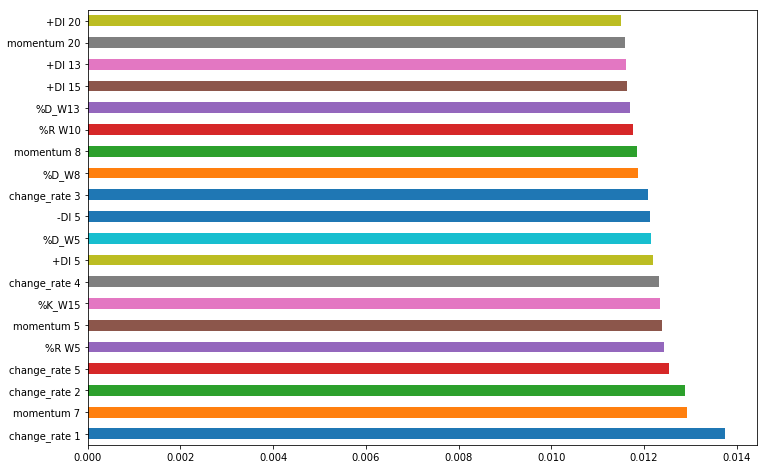

In [36]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X, y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', figsize=(12,8))

tmp_df = feat_importances.nlargest(20)
print(tmp_df)
print(tmp_df.index.tolist())

plt.show()

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 20)
fit = rfe.fit(X, y)

features = list(df.columns[:-1])
state = list(fit.support_)
rank = list(fit.ranking_)

data = {'Name': features, 'State': state, 'Rank': rank}
new_df = pd.DataFrame(data)

new_df.drop(new_df[new_df.State == False].index, inplace=True)

print(new_df)
print(list(new_df['Name']))

             Name  State  Rank
19          %K_W8   True     1
22         %D_W10   True     1
30         %D_W21   True     1
32          %R W7   True     1
33          %R W8   True     1
38         %R W20   True     1
40          RSI 5   True     1
48         RSI 21   True     1
52    momentum 10   True     1
53    momentum 13   True     1
58  change_rate 1   True     1
60  change_rate 3   True     1
69          +DI 5   True     1
70          -DI 5   True     1
71          ADX 5   True     1
73          -DI 7   True     1
77          ADX 8   True     1
88         -DI 15   True     1
91         -DI 20   True     1
93         +DI 21   True     1
['%K_W8', '%D_W10', '%D_W21', '%R W7', '%R W8', '%R W20', 'RSI 5', 'RSI 21', 'momentum 10', 'momentum 13', 'change_rate 1', 'change_rate 3', '+DI 5', '-DI 5', 'ADX 5', '-DI 7', 'ADX 8', '-DI 15', '-DI 20', '+DI 21']


In [38]:
from sklearn.linear_model import Ridge


def ridge_coef_compute(df, X, y):
    ridge = Ridge(alpha=1.0)
    ridge.fit(X,y)

    col_names = list(df.columns[:-1])
    coefs = ridge.coef_
    
    lst = zip(coefs, col_names)
    
    coefs = list(coefs)
        
    data = {'Feature': col_names, 'coef': coefs}
    ridge_df = pd.DataFrame(data)
    
    return ridge_df

ridge_df = ridge_coef_compute(df, X, y)
ridge_df.sort_values(by=['coef'], ascending=False, inplace=True)
print("Ridge model:\n", ridge_df.head(20))
print(list(ridge_df['Feature'].head(20)))

Ridge model:
           Feature      coef
53    momentum 13  0.263399
32          %R W7  0.211672
15   MACD_12,26,9  0.194760
71          ADX 5  0.179541
24         %D_W13  0.177015
51     momentum 8  0.176708
18          %D_W5  0.133796
19          %K_W8  0.133386
28         %D_W20  0.132284
38         %R W20  0.115505
48         RSI 21  0.111381
88         -DI 15  0.104314
93         +DI 21  0.104176
57    momentum 21  0.100360
85         -DI 14  0.098519
59  change_rate 2  0.098297
86         ADX 14  0.089528
82         -DI 13  0.085564
89         ADX 15  0.085242
67         ATR 21  0.084065
['momentum 13', '%R W7', 'MACD_12,26,9', 'ADX 5', '%D_W13', 'momentum 8', '%D_W5', '%K_W8', '%D_W20', '%R W20', 'RSI 21', '-DI 15', '+DI 21', 'momentum 21', '-DI 14', 'change_rate 2', 'ADX 14', '-DI 13', 'ADX 15', 'ATR 21']


change_rate 1    0.06
MACD_12,26,9     0.04
momentum 8       0.04
ADX 5            0.04
20ma             0.03
%D_W13           0.03
momentum 10      0.03
change_rate 2    0.03
change_rate 3    0.03
change_rate 5    0.03
-DI 5            0.03
ADX 20           0.03
-DI 21           0.03
ADX 21           0.03
%R W7            0.02
RSI 5            0.02
momentum 13      0.02
change_rate 4    0.02
ATR 21           0.02
ATR_scaled 21    0.02
dtype: float64
['change_rate 1', 'MACD_12,26,9', 'momentum 8', 'ADX 5', '20ma', '%D_W13', 'momentum 10', 'change_rate 2', 'change_rate 3', 'change_rate 5', '-DI 5', 'ADX 20', '-DI 21', 'ADX 21', '%R W7', 'RSI 5', 'momentum 13', 'change_rate 4', 'ATR 21', 'ATR_scaled 21']


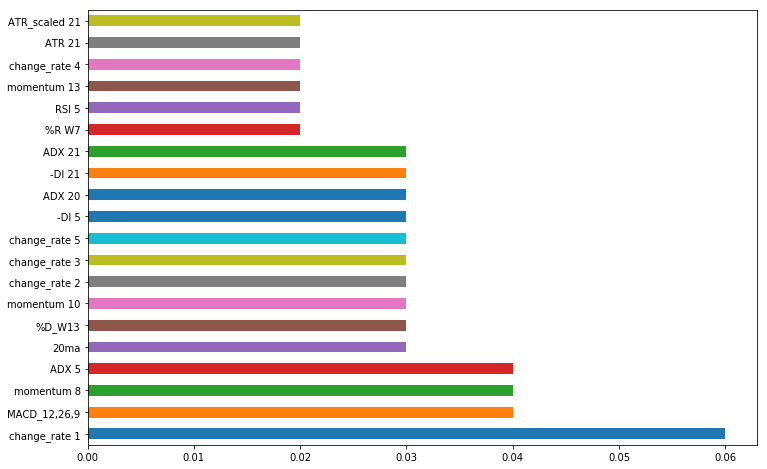

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X, y)

feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', figsize=(12,8))

tmp_df = feat_importances.nlargest(20)
print(tmp_df)
print(tmp_df.index.tolist())

plt.show()

In [40]:
from scipy import stats

# print(X.values)
# print(y.values)

for i in range(X.shape[1]):
    print(X.columns[i], stats.pointbiserialr(X.iloc[:,i].values, y.values))

Price PointbiserialrResult(correlation=-0.00565245560149014, pvalue=0.6928666082738818)
Open PointbiserialrResult(correlation=-0.0035814613917468626, pvalue=0.8023901406609448)
High PointbiserialrResult(correlation=-0.005024497074004852, pvalue=0.7255220391080254)
Low PointbiserialrResult(correlation=-0.004202266968458357, pvalue=0.7690374151582775)
5ma PointbiserialrResult(correlation=-0.002942413063053516, pvalue=0.8371024171534884)
8ma PointbiserialrResult(correlation=-0.0021862614872771983, pvalue=0.8785836312576548)
10ma PointbiserialrResult(correlation=-0.0018654190285141911, pvalue=0.8962926404405303)
13ma PointbiserialrResult(correlation=-0.0014792944711285775, pvalue=0.9176728189665425)
15ma PointbiserialrResult(correlation=-0.001575715476482114, pvalue=0.9123276799486809)
20ma PointbiserialrResult(correlation=-0.002002093404927177, pvalue=0.8887420089558181)
21ma PointbiserialrResult(correlation=-0.002097487661248992, pvalue=0.8834778460914964)
ema5 PointbiserialrResult(corre